In [1]:
setwd('/import/hd//sc')
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [2]:
sce = readRDS('./scRNA.rds')

In [3]:
table(sce$celltype)


     ADs     Endo      Fib Lymphoid    Mural  Myeloid 
    4025    12465    44889     5107     6472    15914 

In [4]:
Idents(sce) = 'celltype'

In [5]:
sce1 = subset(sce,idents = c('Lymphoid','ADs','Endo'))

In [10]:
meta1  = sce1@meta.data[,c(1,12)]

In [22]:
colnames(meta1)[2] = 'celltype2' 

In [7]:
fib = readRDS('/import/a.IMCDataAnalysi2/annotation/scRNA.fibro_reClust.seurat.rds')

In [12]:
fib.meta = fib@meta.data[,c(1,14)]

In [13]:
mye = readRDS('/import/a.IMCDataAnalysi2/annotation/scRNA.myeloid_reClust.seurat.rds')

In [14]:
mye.meta = mye@meta.data[,c(1,14)]

In [16]:
mural = readRDS('/import/a.IMCDataAnalysi2/annotation/scRNA.mural_reClust.seurat.rds')

In [19]:
mural.meta = mural@meta.data[,c(1,13)]

In [23]:
merged = rbind(fib.meta,mye.meta,mural.meta,meta1)

In [24]:
sce = AddMetaData(sce,metadata = merged)

In [26]:
Idents(sce) = 'celltype2'

In [34]:
sce2 = subset(sce,idents = na.omit(unique(sce$celltype2)))

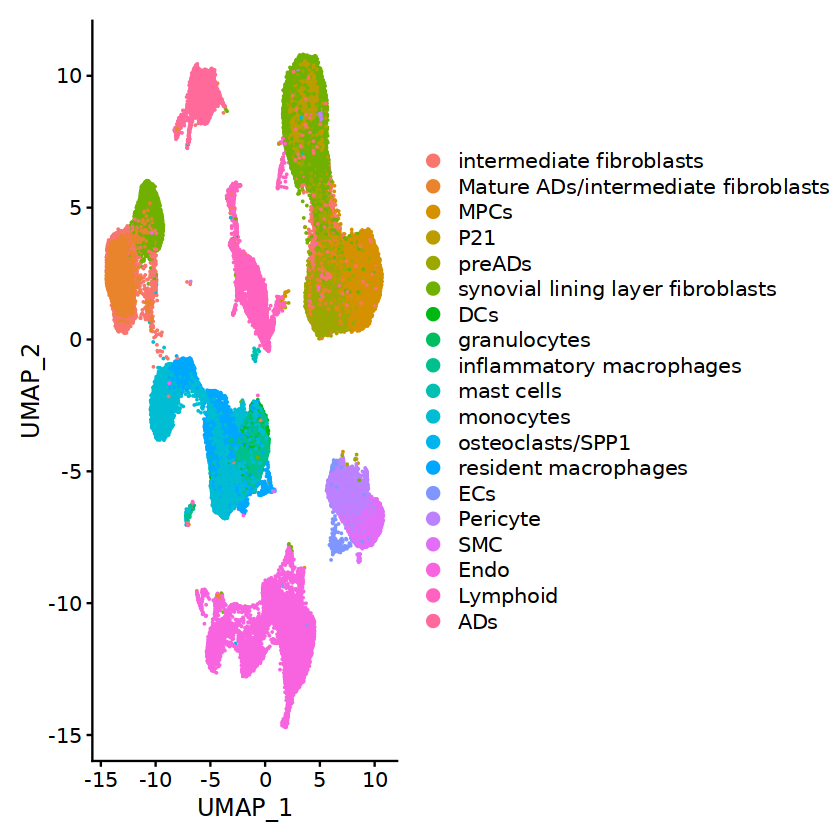

In [35]:
DimPlot(sce2)

In [36]:
Idents(sce2) = 'celltype2'

sce.markers <- FindAllMarkers(object = sce2, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)
 

library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)

Calculating cluster intermediate fibroblasts

Calculating cluster Mature ADs/intermediate fibroblasts

Calculating cluster MPCs

Calculating cluster P21

Calculating cluster preADs

Calculating cluster synovial lining layer fibroblasts

Calculating cluster DCs

Calculating cluster granulocytes

Calculating cluster inflammatory macrophages

Calculating cluster mast cells

Calculating cluster monocytes

Calculating cluster osteoclasts/SPP1

Calculating cluster resident macrophages

Calculating cluster ECs

Calculating cluster Pericyte

Calculating cluster SMC

Calculating cluster Endo

Calculating cluster Lymphoid

Calculating cluster ADs


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [42]:
library(tidyr)

Warning message:
"package 'tidyr' was built under R version 4.2.3"

Attaching package: 'tidyr'


The following object is masked from 'package:reshape2':

    smiths




In [43]:
library(reshape2)
a = sce.markers %>% pivot_wider( names_from = cluster, values_from = gene)

In [45]:

list1 <- as.list(a[,6:11])

In [46]:

my_list_no_na <- lapply(list1, unique)
save(my_list_no_na,file = 'my_list_no_na2.rda')

In [47]:
saveRDS(sce2,file = 'sce2.merged.rds')

In [48]:
getwd()

[1] "/import/hd/sc"

In [49]:
library(nichenetr)

Warning message:
"package 'nichenetr' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
